In [ ]:
!ls

 annotation_tool   detect.py   __pycache__    runs	'ubdivisions=1'
 cfg		   models.py   README.md      test.py	 utils
 customdata.zip    out_out     results.json   ting	 vim.exe.stackdump
 data		   output      results.png    train.py	 weights


In [ ]:
import sys
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
sys.path.append("/content/YoloV3")

In [ ]:
!rm -rf YoloV3

In [ ]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 43.79 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
!wget --header="Host: doc-0g-7g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/" --header="Cookie: AUTH_gv55ghe7orpogd0359k68jegm9u4dnnv_nonce=ae5vkhq1vmjim" --header="Connection: keep-alive" "https://doc-0g-7g-docs.googleusercontent.com/docs/securesc/o6utoeuje0vuc1m37co2f57p4huviff1/5ef8p10m7kmi4a2tv139fk0du36ab6k2/1603565100000/07753190970592086453/07753190970592086453/1ICbZbPhlacL938ZN0O1OgUbwgME4uKDN?e=download&authuser=1&nonce=ae5vkhq1vmjim&user=07753190970592086453&hash=su0hopiibl768glk0o6ooko49n15mss7" -c -O 'customdata.zip'

--2020-10-24 18:46:15--  https://doc-0g-7g-docs.googleusercontent.com/docs/securesc/o6utoeuje0vuc1m37co2f57p4huviff1/5ef8p10m7kmi4a2tv139fk0du36ab6k2/1603565100000/07753190970592086453/07753190970592086453/1ICbZbPhlacL938ZN0O1OgUbwgME4uKDN?e=download&authuser=1&nonce=ae5vkhq1vmjim&user=07753190970592086453&hash=su0hopiibl768glk0o6ooko49n15mss7
Resolving doc-0g-7g-docs.googleusercontent.com (doc-0g-7g-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-0g-7g-docs.googleusercontent.com (doc-0g-7g-docs.googleusercontent.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘customdata.zip’

customdata.zip          [        <=>         ] 261.12M   113MB/s    in 2.3s    

2020-10-24 18:46:17 (113 MB/s) - ‘customdata.zip’ saved [273805486]



In [ ]:
!cp -r customdata data/.

In [ ]:
cd YoloV3/

/content/YoloV3


In [ ]:
!mv data/customdata/Images data/customdata/images

In [ ]:
!mv data/customdata/Labels data/customdata/labels

In [ ]:
!mv data/customdata data/backup_custom

In [ ]:
!mkdir weights
!mv yolov3-spp-ultralytics.pt weights/.


In [ ]:
!wget --header="Host: doc-04-bg-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_o3nuvhqa3visn5jb4ilidti85e6oh3s8=16041018455050047174|1603564950000|naqf5hmpo31pe68rclcdijmamo46kjpi" --header="Connection: keep-alive" "https://doc-04-bg-docs.googleusercontent.com/docs/securesc/qums0ttr026moi738svh01nbv5e08apq/v825j35f67lbihau9iv3hkjcjc1ha2lb/1603565025000/18003229793517042864/16041018455050047174/1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4?e=download&authuser=0" -c -O 'yolov3-spp-ultralytics.pt'

--2020-10-24 18:45:08--  https://doc-04-bg-docs.googleusercontent.com/docs/securesc/qums0ttr026moi738svh01nbv5e08apq/v825j35f67lbihau9iv3hkjcjc1ha2lb/1603565025000/18003229793517042864/16041018455050047174/1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4?e=download&authuser=0
Resolving doc-04-bg-docs.googleusercontent.com (doc-04-bg-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-04-bg-docs.googleusercontent.com (doc-04-bg-docs.googleusercontent.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘yolov3-spp-ultralytics.pt’

yolov3-spp-ultralyt     [          <=>       ] 240.61M  87.7MB/s    in 2.7s    

2020-10-24 18:45:11 (87.7 MB/s) - ‘yolov3-spp-ultralytics.pt’ saved [252297867]



In [ ]:
# !python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

In [ ]:
!head -n 10 data/customdata/test.txt

data/customdata/images/img_010.jpg
data/customdata/images/img_021.jpg
data/customdata/images/img_031.jpg
data/customdata/images/img_041.jpg
data/customdata/images/img_053.jpg
data/customdata/images/img_063.jpg
data/customdata/images/img_073.jpg
data/customdata/images/img_083.jpg
data/customdata/images/img_095.jpg
data/customdata/images/img_105.jpg


In [ ]:
!mv data/newcustomdata data/customdata

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 10 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=10, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-24 19:24:08.650337: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3026 found, 127 missing, 38 empty, 0 duplicate, for 3191 images): 100% 3191/3191 [00:00<00:00, 8631.90it/s]
Caching images (1.8GB): 100% 3191/3191 [00:20<00:00, 155.14it/s]
Caching labels (297 found, 14 missing, 6 empty, 0 duplicate, for 317 images): 100% 317/317 

In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/20 data/customdata/images/img001.jpg: 512x512 1 walles, Done. (0.045s)
image 2/20 data/customdata/images/img002.jpg: 320x512 1 walles, Done. (0.033s)
image 3/20 data/customdata/images/img003.jpg: 384x512 2 walles, Done. (0.027s)
image 4/20 data/customdata/images/img004.jpg: 320x512 2 walles, Done. (0.021s)
image 5/20 data/customdata/images/img005.jpg: 320x512 1 walles, Done. (0.021s)
image 6/20 data/customdata/images/img006.jpg: 384x512 1 walles, Done. (0.024s)
image 7/20 data/customdata/images/img007.jpg: 384x512

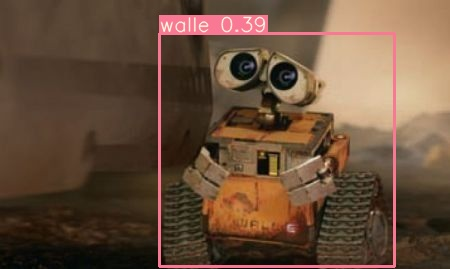

In [ ]:
Image(filename='out_out/img002.jpg', width=600)

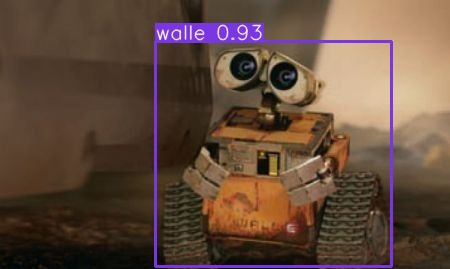

In [ ]:
Image(filename='out_out/img002.jpg', width=600)

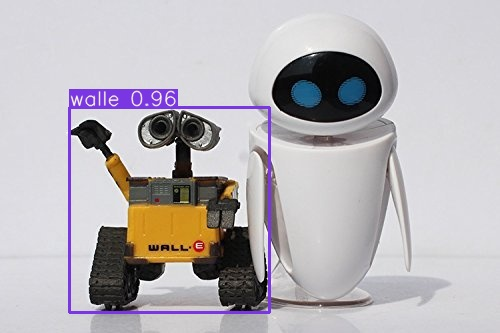

In [ ]:
Image(filename='out_out/img003.jpg', width=600)

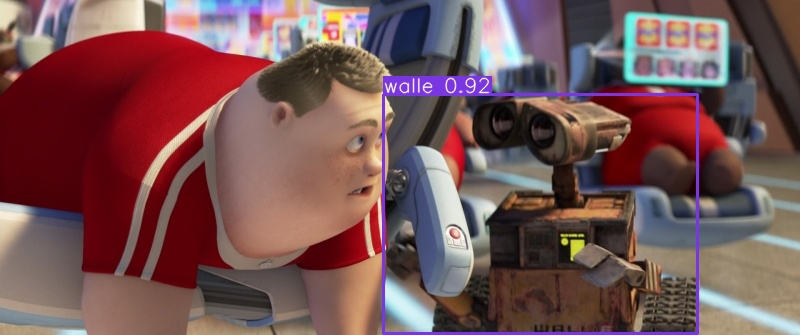

In [ ]:
Image(filename='out_out/img020.jpg', width=600)